# EDA Project County House

## General Setup

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Read both tables
sales = pd.read_csv("data/king_county_house_sales.csv")
details = pd.read_csv("data/king_county_house_details.csv")

#Merge (equivalent to SQL JOIN)
combined = pd.merge(
    sales, 
    details, 
    left_on='house_id',  # Column in sales table
    right_on='id',        # Column in details table
    how='outer'           # FULL JOIN
)

#Note: There might be duplicate columns after the merge
combined.columns

Index(['date', 'price', 'house_id', 'id_x', 'id_y', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Cleaning Phase 1

- Unify column names
- Remove duplicate columns
- Adjust amount of decimal numbers
- Change data types for certain columns (e.g. date)

In [4]:
# replacing empty spaces with underscores in column names
combined.columns = combined.columns.str.replace(' ','_')
# changing all column names to lower case
combined.columns = combined.columns.str.lower()
combined.head(20)

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000.000,1000102,2495,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,2015-04-22,300000.000,1000102,2496,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
2,2014-05-08,647500.000,1200019,6730,1200019,4.000,1.750,2060.000,26036.000,1.000,...,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000
3,2014-08-11,400000.000,1200021,8405,1200021,3.000,1.000,1460.000,43000.000,1.000,...,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000
4,2015-04-01,235000.000,2800031,8801,2800031,3.000,1.000,1430.000,7599.000,1.500,...,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000
5,2015-03-19,402500.000,3600057,3554,3600057,4.000,2.000,1650.000,3504.000,1.000,...,7,760.000,890.000,1951,20130.000,98144,47.580,-122.294,1480.000,3504.000
6,2015-03-30,680000.000,3600072,18507,3600072,4.000,2.750,2220.000,5310.000,1.000,...,7,1170.000,1050.000,1951,NaN,98144,47.580,-122.294,1540.000,4200.000
7,2015-02-24,178000.000,3800008,3198,3800008,5.000,1.500,1990.000,18200.000,1.000,...,7,1990.000,0.000,1960,NaN,98178,47.494,-122.262,1860.000,8658.000
8,2014-07-09,487000.000,5200087,21048,5200087,4.000,2.500,2540.000,5001.000,2.000,...,9,2540.000,0.000,2005,0.000,98108,47.542,-122.302,2360.000,6834.000
9,2014-11-12,281000.000,6200017,4330,6200017,3.000,1.000,1340.000,21336.000,1.500,...,5,1340.000,0.000,1945,0.000,98032,47.402,-122.273,1340.000,37703.000


In [5]:
# renaming last column
combined = combined.rename({'date':'date_sold'},axis=1)
combined = combined.rename({'id_x':'sale_id'},axis=1)
combined = combined.rename({'bedrooms':'no_bedrooms'},axis=1)
combined = combined.rename({'bathrooms':'no_bathrooms'},axis=1)
combined = combined.rename({'floors':'no_floors'},axis=1)
combined = combined.rename({'view':'view_quality'},axis=1)
combined.head(9)


,date_sold,price,house_id,sale_id,id_y,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000.000,1000102,2495,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,2015-04-22,300000.000,1000102,2496,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
2,2014-05-08,647500.000,1200019,6730,1200019,4.000,1.750,2060.000,26036.000,1.000,...,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000
3,2014-08-11,400000.000,1200021,8405,1200021,3.000,1.000,1460.000,43000.000,1.000,...,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000
4,2015-04-01,235000.000,2800031,8801,2800031,3.000,1.000,1430.000,7599.000,1.500,...,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000
5,2015-03-19,402500.000,3600057,3554,3600057,4.000,2.000,1650.000,3504.000,1.000,...,7,760.000,890.000,1951,20130.000,98144,47.580,-122.294,1480.000,3504.000
6,2015-03-30,680000.000,3600072,18507,3600072,4.000,2.750,2220.000,5310.000,1.000,...,7,1170.000,1050.000,1951,NaN,98144,47.580,-122.294,1540.000,4200.000
7,2015-02-24,178000.000,3800008,3198,3800008,5.000,1.500,1990.000,18200.000,1.000,...,7,1990.000,0.000,1960,NaN,98178,47.494,-122.262,1860.000,8658.000
8,2014-07-09,487000.000,5200087,21048,5200087,4.000,2.500,2540.000,5001.000,2.000,...,9,2540.000,0.000,2005,0.000,98108,47.542,-122.302,2360.000,6834.000


In [6]:
# remove duplicate column
combined_dropped = combined.drop('id_y', axis=1)
combined_dropped.columns

# check how many duplicated rows exist in the data frame
combined_dropped.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [7]:
# change "date" dtype to datetime with format %Y/%m/%d
combined_dropped['date_sold'] = pd.to_datetime(combined_dropped['date_sold'])
combined_dropped.dtypes

date_sold        datetime64[ns]
price                   float64
house_id                  int64
sale_id                   int64
no_bedrooms             float64
no_bathrooms            float64
sqft_living             float64
sqft_lot                float64
no_floors               float64
waterfront              float64
view_quality            float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

Column                    Dtype         New Dtype
date_sold                object     datetime64[ns]
price                   float64             int64
house_id                  int64
sale_id                   int64
no_bedrooms             float64             int64
no_bathrooms            float64             int64
sqft_living             float64             int64
sqft_lot                float64             int64
no_floors               float64             int64
waterfront              float64             boolian
view_quality            float64             int64
condition                 int64             
grade                     int64
sqft_above              float64             int64
sqft_basement           float64             int64 
yr_built                  int64
yr_renovated            float64             int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64             int64
sqft_lot15              float64             int64

In [8]:
combined_dropped = combined_dropped.astype({"price" : int}) 
combined_dropped.dtypes

date_sold        datetime64[ns]
price                     int64
house_id                  int64
sale_id                   int64
no_bedrooms             float64
no_bathrooms            float64
sqft_living             float64
sqft_lot                float64
no_floors               float64
waterfront              float64
view_quality            float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [9]:
combined_dropped['waterfront'].nunique()

# count cases for waterfront
combined_dropped['waterfront'].value_counts()

# count empty values for waterfront
combined_dropped['waterfront'].isnull().sum()

# fill NaN values in waterfront with 0  

combined_dropped["waterfront"] = combined_dropped["waterfront"].fillna(0)

In [10]:
combined_dropped["waterfront"].value_counts()

waterfront
0.000    21451
1.000      146
Name: count, dtype: int64

In [11]:
# Changing the data type for several columns
combined_dropped = combined_dropped.astype({"price" : int, "no_bedrooms" : int, "no_bathrooms" : int, "sqft_living" : int, "sqft_lot" : int, "waterfront" : bool, "no_floors" : int,  "sqft_living15" : int, "sqft_lot15" : int, "sqft_above": int})
combined_dropped.head()

#for later
#"view_quality" : int, "yr_renovated" : int, "sqft_basement" : int,

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000,1000102,2495,6,3,2400,9373,2,False,...,7,2400,0.000,1991,0.000,98002,47.326,-122.214,2060,7316
1,2015-04-22,300000,1000102,2496,6,3,2400,9373,2,False,...,7,2400,0.000,1991,0.000,98002,47.326,-122.214,2060,7316
2,2014-05-08,647500,1200019,6730,4,1,2060,26036,1,False,...,8,1160,900.000,1947,0.000,98166,47.444,-122.351,2590,21891
3,2014-08-11,400000,1200021,8405,3,1,1460,43000,1,False,...,7,1460,0.000,1952,0.000,98166,47.443,-122.347,2250,20023
4,2015-04-01,235000,2800031,8801,3,1,1430,7599,1,False,...,6,1010,420.000,1930,0.000,98168,47.478,-122.265,1290,10320


In [12]:
# look for missing values in the data frame
combined_dropped.isnull().sum()

date_sold           0
price               0
house_id            0
sale_id             0
no_bedrooms         0
no_bathrooms        0
sqft_living         0
sqft_lot            0
no_floors           0
waterfront          0
view_quality       63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
# Display first 100 rows of three columns named "sqft_living", "sqft_above", "sqft_basement"

combined_dropped[["sqft_living", "sqft_above", "sqft_basement"]].query("sqft_basement.isna()").head(100)

,sqft_living,sqft_above,sqft_basement
21,1910,1910,NaN
42,1200,1200,NaN
62,1500,1500,NaN
90,3370,2840,NaN
103,1000,1000,NaN
...,...,...,...
4507,1470,1000,NaN
4525,2320,2320,NaN
4534,2850,1930,NaN
4637,2190,1110,NaN


In [14]:
# Replace missing values in "sqft_basement" with the difference between "sqft_living" and "sqft_above"
combined_dropped["sqft_basement"] = combined_dropped["sqft_living"] - combined_dropped["sqft_above"]

In [15]:
# look for missing values in the data frame
combined_dropped.isnull().sum()

date_sold           0
price               0
house_id            0
sale_id             0
no_bedrooms         0
no_bathrooms        0
sqft_living         0
sqft_lot            0
no_floors           0
waterfront          0
view_quality       63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
#Convert all 0 values in column "yr_renovated" to NaN
combined_dropped["yr_renovated"] = combined_dropped["yr_renovated"].replace(0, np.nan)

In [17]:
# fill NaN values in yr_renovated with values from yr_built

combined_dropped["yr_renovated"] = combined_dropped["yr_renovated"].fillna(combined_dropped["yr_built"])
combined_dropped.isnull().sum()

date_sold         0
price             0
house_id          0
sale_id           0
no_bedrooms       0
no_bathrooms      0
sqft_living       0
sqft_lot          0
no_floors         0
waterfront        0
view_quality     63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [18]:
combined_dropped.describe()["yr_renovated"]

count   21597.000
mean     2591.769
min      1900.000
25%      1954.000
50%      1977.000
75%      2000.000
max     20150.000
std      3280.827
Name: yr_renovated, dtype: float64

In [19]:
combined_dropped[combined_dropped["yr_renovated"] > 2015]

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,2015-03-19,402500,3600057,3554,4,2,1650,3504,1,False,...,7,760,890,1951,20130.000,98144,47.580,-122.294,1480,3504
18,2014-12-03,496000,9000025,8669,2,1,1420,4635,2,False,...,7,1420,0,1941,19730.000,98115,47.680,-122.304,1810,4635
50,2014-09-11,1490000,31000165,4740,5,3,3620,7821,2,False,...,10,2790,830,1958,20100.000,98040,47.574,-122.215,2690,9757
72,2015-02-21,1510000,46100204,217,5,3,3300,33474,1,False,...,9,1870,1430,1957,19910.000,98040,47.567,-122.210,3836,20953
74,2014-06-17,2030000,46100504,17967,4,3,4100,22798,1,False,...,11,2540,1560,1934,19790.000,98040,47.565,-122.210,3880,18730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21462,2014-07-15,498000,9826701345,12831,3,2,1620,2640,2,False,...,7,1620,0,1900,19930.000,98122,47.604,-122.305,1370,3840
21476,2015-05-04,440000,9828200746,10881,2,1,1120,1024,2,False,...,8,1120,0,1970,19980.000,98122,47.617,-122.298,1120,1549
21492,2014-05-05,831000,9828700200,1277,4,3,2170,4000,2,False,...,9,1610,560,1982,20110.000,98112,47.620,-122.292,1670,4000
21505,2014-08-06,529000,9828701690,18471,3,2,1530,3400,1,False,...,7,990,540,1907,20140.000,98112,47.620,-122.296,1880,4212


In [20]:
mask = combined_dropped["yr_renovated"] > 2015
combined_dropped.loc[mask, "yr_renovated"] = combined_dropped.loc[mask, "yr_renovated"] / 10
combined_dropped[combined_dropped["yr_renovated"] > 2015]

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
combined_dropped.describe()["yr_renovated"]

count   21597.000
mean     1972.945
min      1900.000
25%      1954.000
50%      1977.000
75%      1999.000
max      2015.000
std        28.945
Name: yr_renovated, dtype: float64

In [22]:
# Set float display format to 2 decimal places
#pd.set_option("display.float_format", "{:.2f}".format)




In [23]:
combined_dropped.lat[0]

np.float64(47.3262)

In [24]:
# asfaf

combined_dropped.head(25)

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000,1000102,2495,6,3,2400,9373,2,False,...,7,2400,0,1991,1991.000,98002,47.326,-122.214,2060,7316
1,2015-04-22,300000,1000102,2496,6,3,2400,9373,2,False,...,7,2400,0,1991,1991.000,98002,47.326,-122.214,2060,7316
2,2014-05-08,647500,1200019,6730,4,1,2060,26036,1,False,...,8,1160,900,1947,1947.000,98166,47.444,-122.351,2590,21891
3,2014-08-11,400000,1200021,8405,3,1,1460,43000,1,False,...,7,1460,0,1952,1952.000,98166,47.443,-122.347,2250,20023
4,2015-04-01,235000,2800031,8801,3,1,1430,7599,1,False,...,6,1010,420,1930,1930.000,98168,47.478,-122.265,1290,10320
5,2015-03-19,402500,3600057,3554,4,2,1650,3504,1,False,...,7,760,890,1951,2013.000,98144,47.580,-122.294,1480,3504
6,2015-03-30,680000,3600072,18507,4,2,2220,5310,1,False,...,7,1170,1050,1951,1951.000,98144,47.580,-122.294,1540,4200
7,2015-02-24,178000,3800008,3198,5,1,1990,18200,1,False,...,7,1990,0,1960,1960.000,98178,47.494,-122.262,1860,8658
8,2014-07-09,487000,5200087,21048,4,2,2540,5001,2,False,...,9,2540,0,2005,2005.000,98108,47.542,-122.302,2360,6834
9,2014-11-12,281000,6200017,4330,3,1,1340,21336,1,False,...,5,1340,0,1945,1945.000,98032,47.402,-122.273,1340,37703


In [25]:
# Replace missing value in "view_quality" for row with index 16736 with 4

combined_dropped.loc[16736, "view_quality"] = 4

# fill NaN values in view_quality with 0  

combined_dropped["view_quality"] = combined_dropped["view_quality"].fillna(0)

# look for missing values in the data frame
combined_dropped.isnull().sum()

date_sold        0
price            0
house_id         0
sale_id          0
no_bedrooms      0
no_bathrooms     0
sqft_living      0
sqft_lot         0
no_floors        0
waterfront       0
view_quality     0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [26]:
combined_dropped = combined_dropped.astype({"view_quality": int})
combined_dropped.dtypes

date_sold        datetime64[ns]
price                     int64
house_id                  int64
sale_id                   int64
no_bedrooms               int64
no_bathrooms              int64
sqft_living               int64
sqft_lot                  int64
no_floors                 int64
waterfront                 bool
view_quality              int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [27]:
combined_dropped = combined_dropped.astype({"yr_renovated": int})
combined_dropped.dtypes

date_sold        datetime64[ns]
price                     int64
house_id                  int64
sale_id                   int64
no_bedrooms               int64
no_bathrooms              int64
sqft_living               int64
sqft_lot                  int64
no_floors                 int64
waterfront                 bool
view_quality              int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Cleaning up Outliers

#### Price Outliers

In [98]:
# Getting rid of outliers for price

price_Q1 = combined_dropped['price'].quantile(0.25)
price_Q3 = combined_dropped['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1

upper = price_Q3 + 1.5 * price_IQR
lower = price_Q1 - 1.5 * price_IQR

combined_clean = combined_dropped[(combined_dropped['price'] >= lower) & (combined_dropped['price'] <= upper)]

## First Data Exploration

Creating plots for each variable and analyse the patterns between them

#### Price

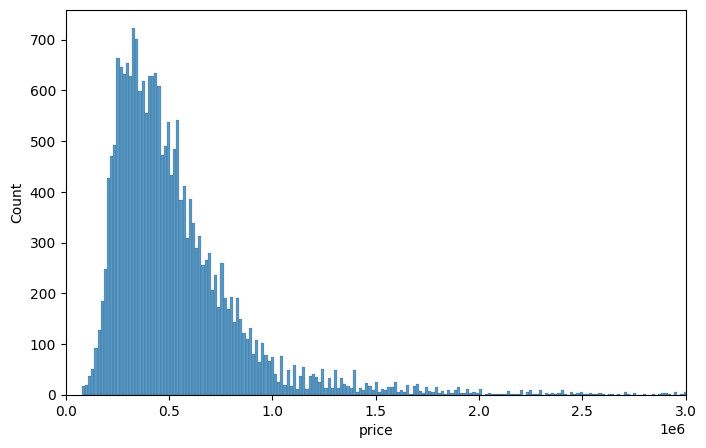

In [28]:
sns.histplot(data=combined_dropped, x="price", bins=500
             )
plt.xlim(0, 3000000)
plt.show()

#### Date Sold

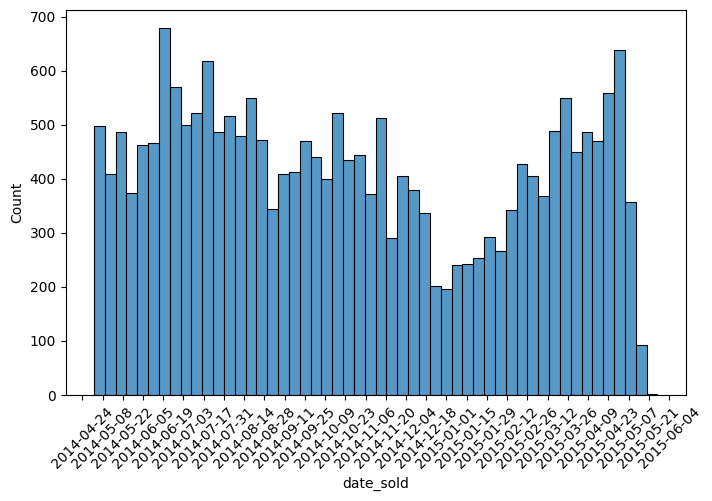

In [29]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="date_sold", bins=52)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
plt.show()

#### Bathrooms

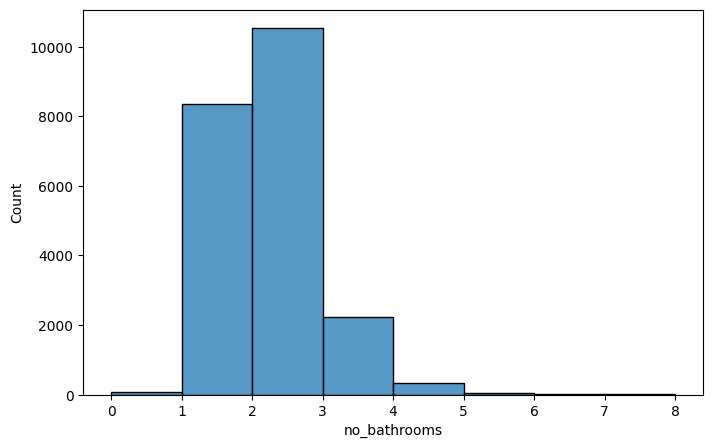

In [30]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="no_bathrooms", bins=8)
plt.xticks(rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

#### Bedrooms

In [31]:
combined_dropped.describe()["no_bedrooms"]

count   21597.000
mean        3.373
min         1.000
25%         3.000
50%         3.000
75%         4.000
max        33.000
std         0.926
Name: no_bedrooms, dtype: float64

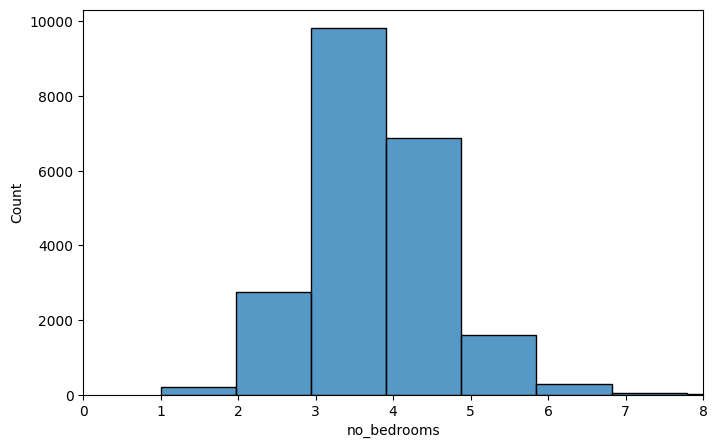

In [32]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="no_bedrooms", bins=33)
plt.xticks(rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(0, 8)
plt.show()

#### Sqft_Basement

In [33]:
combined_dropped.describe()["sqft_basement"]


count   21597.000
mean      291.725
min         0.000
25%         0.000
50%         0.000
75%       560.000
max      4820.000
std       442.668
Name: sqft_basement, dtype: float64

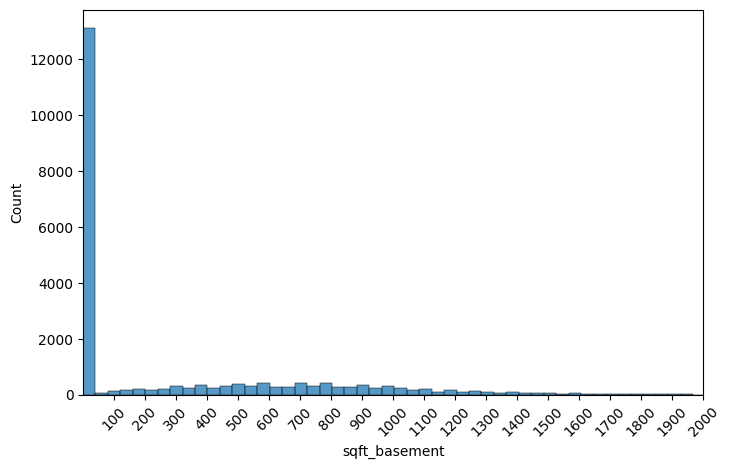

In [34]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_basement") #, bins=30)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xlim(1, 2000)
plt.show()

#### Sqft_Living

In [35]:
combined_dropped.describe()["sqft_living"]

count   21597.000
mean     2080.322
min       370.000
25%      1430.000
50%      1910.000
75%      2550.000
max     13540.000
std       918.106
Name: sqft_living, dtype: float64

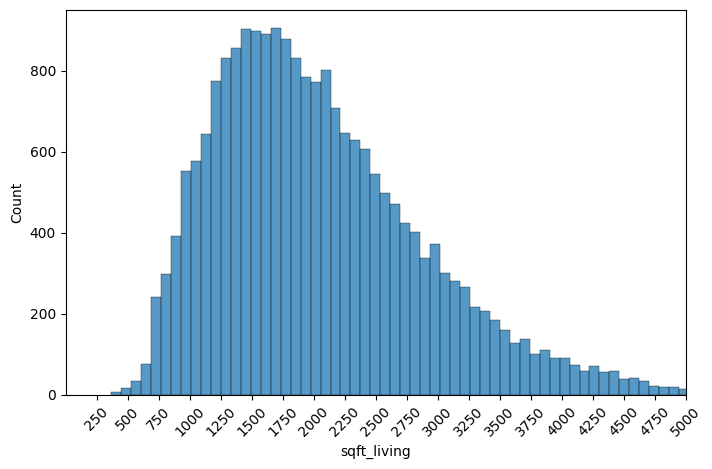

In [36]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_living") #, bins=30)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
plt.xlim(1, 5000)
plt.show()

In [37]:
combined_dropped.describe()["sqft_above"]

count   21597.000
mean     1788.597
min       370.000
25%      1190.000
50%      1560.000
75%      2210.000
max      9410.000
std       827.760
Name: sqft_above, dtype: float64

#### Sqft_Above

In [38]:
combined_dropped.describe()["sqft_above"]

count   21597.000
mean     1788.597
min       370.000
25%      1190.000
50%      1560.000
75%      2210.000
max      9410.000
std       827.760
Name: sqft_above, dtype: float64

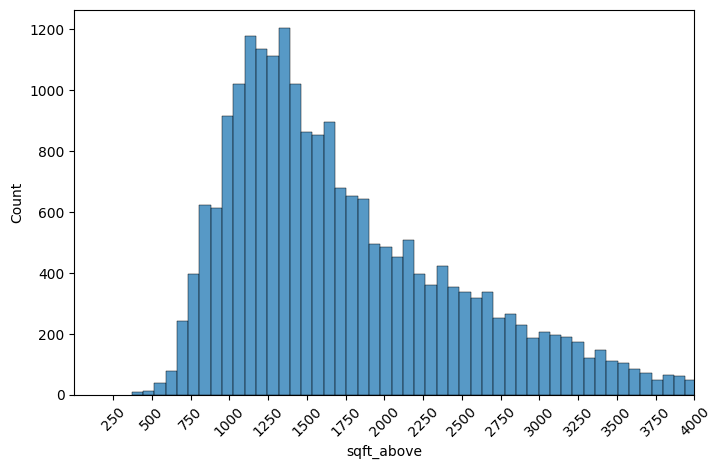

In [39]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_above") #, bins=30)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(250))
plt.xlim(1, 4000)
plt.show()

#### Sqft_Lot

In [40]:
combined_dropped.describe()["sqft_lot"]

count     21597.000
mean      15099.409
min         520.000
25%        5040.000
50%        7618.000
75%       10685.000
max     1651359.000
std       41412.637
Name: sqft_lot, dtype: float64

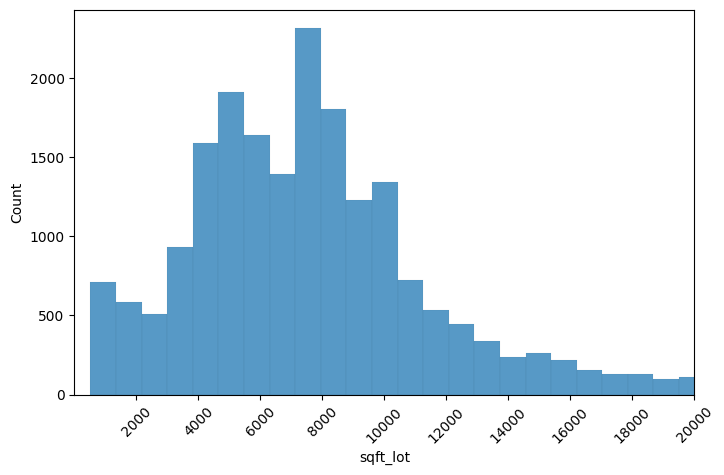

In [41]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_lot", bins=2000)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.xlim(1, 20000)
plt.show()

#### View Quality

In [42]:
#count unique values in view_quality   
combined_dropped["view_quality"].value_counts()

view_quality
0    19484
2      957
3      508
1      330
4      318
Name: count, dtype: int64

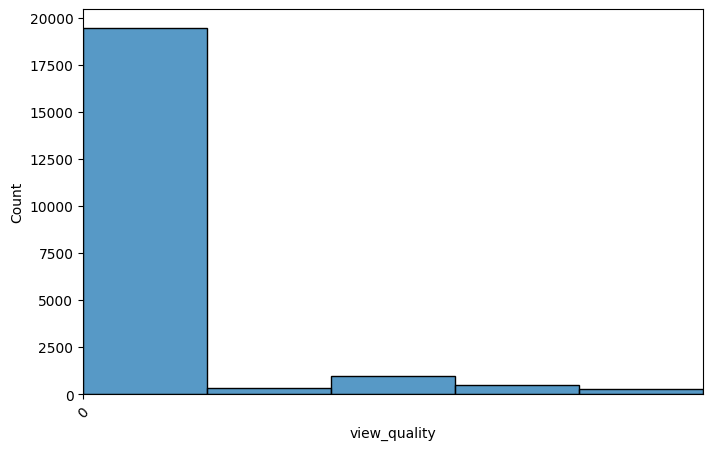

In [43]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="view_quality", bins=5)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.xlim(0, 4)
plt.show()

In [44]:
combined_dropped.loc[16736, "view_quality"]


np.int64(4)

In [45]:
combined_dropped.loc[16736, "view_quality"] = 4
combined_dropped.loc[16736, "view_quality"]

np.int64(4)

#### Year Built

In [46]:

combined_dropped.describe()["yr_built"]

count   21597.000
mean     1971.000
min      1900.000
25%      1951.000
50%      1975.000
75%      1997.000
max      2015.000
std        29.375
Name: yr_built, dtype: float64

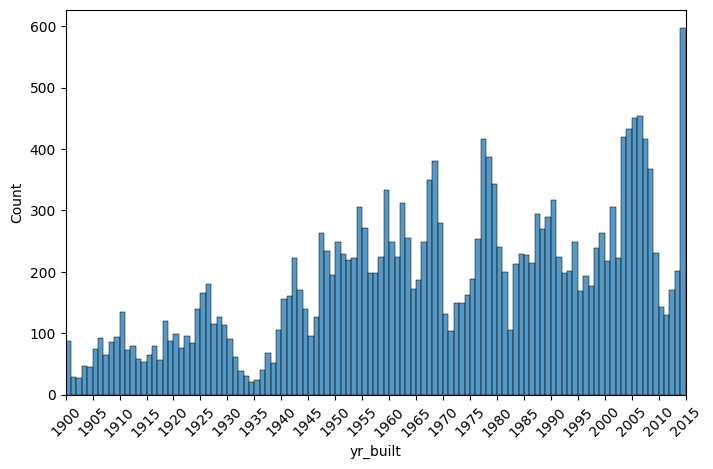

In [47]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="yr_built", bins=115)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlim(1900, 2015)
plt.show()

#### Year Renovated

In [48]:
combined_dropped.describe()["yr_renovated"]

count   21597.000
mean     1972.945
min      1900.000
25%      1954.000
50%      1977.000
75%      1999.000
max      2015.000
std        28.945
Name: yr_renovated, dtype: float64

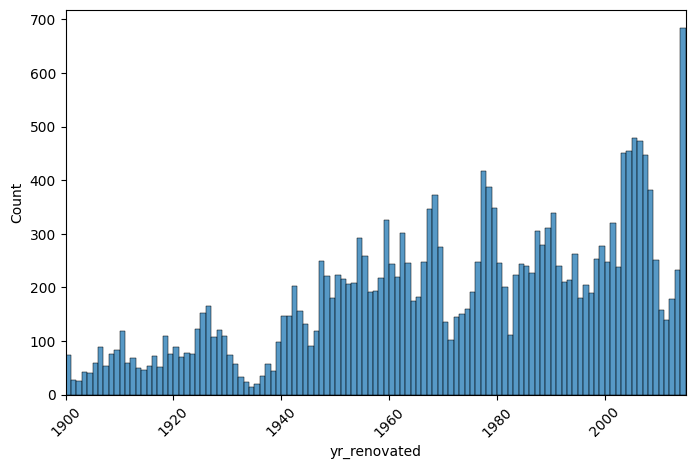

In [49]:
# Show plot for latest renovations or built dates if no renovations
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="yr_renovated", bins=115)
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlim(1900, 2015)
plt.show()

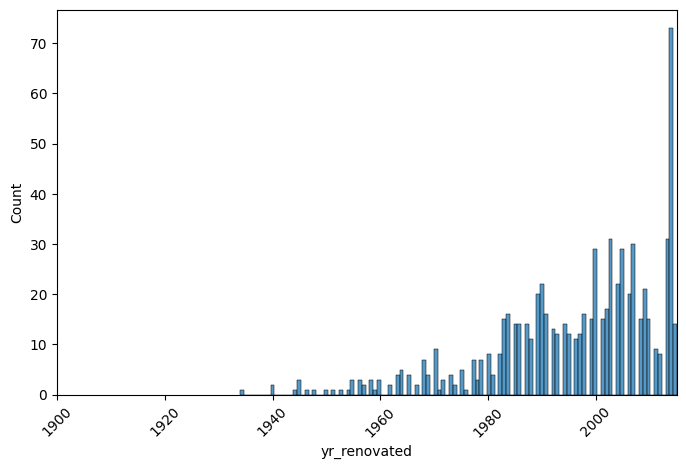

In [50]:
# Only show a plot for renovated houses
df_filtered = combined_dropped[combined_dropped["yr_renovated"] != combined_dropped["yr_built"]]

import matplotlib.ticker as ticker
ax = sns.histplot(data=df_filtered, x="yr_renovated", bins=115)
plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlim(1900, 2015)
plt.show()

#### Number of Floors

In [51]:
combined_dropped.describe()["no_floors"]

count   21597.000
mean        1.446
min         1.000
25%         1.000
50%         1.000
75%         2.000
max         3.000
std         0.552
Name: no_floors, dtype: float64

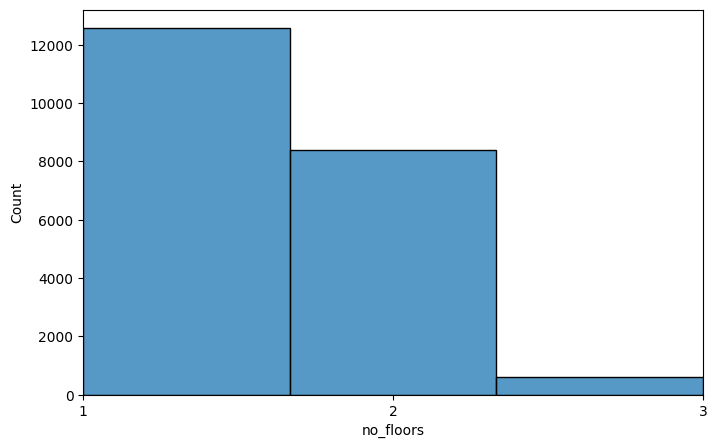

In [52]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="no_floors", bins=3)
plt.xticks(rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(1, 3)
plt.show()

#### Squarefeet Lot15 (Density)

In [53]:
combined_dropped.describe()["sqft_lot15"]

count    21597.000
mean     12758.284
min        651.000
25%       5100.000
50%       7620.000
75%      10083.000
max     871200.000
std      27274.442
Name: sqft_lot15, dtype: float64

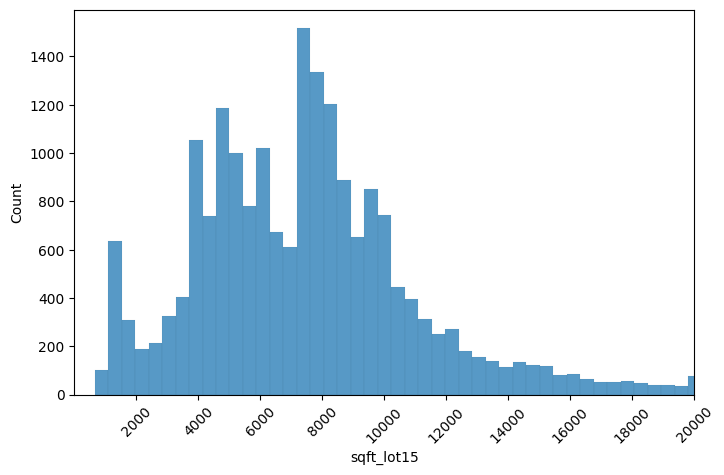

In [54]:
import matplotlib.ticker as ticker
ax = sns.histplot(data=combined_dropped, x="sqft_lot15", bins=2000)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.xlim(1, 20000)
plt.show()

In [55]:
# Create a new column "lot_comp" which reflects the ratio

## Filtering suitable houses from the dataframe


Jennifer Montgomery | Buyer       | High budget, wants to show off, timing within a month, waterfront, renovated, high grades, resell within 1 year

In [56]:
df_filtered = combined_dropped[(combined_dropped["waterfront"] == True) & (combined_dropped["grade"] > 8) & (combined_dropped["yr_renovated"] > 2004)]
df_filtered[["sqft_living", "sqft_basement", "sqft_above", "price", "yr_renovated"]]

,sqft_living,sqft_basement,sqft_above,price,yr_renovated
1089,3760,930,2830,2230000,2014
1090,4410,980,3430,3000000,2014
2889,3786,1852,1934,1380000,2006
4858,9640,4820,4820,4670000,2009
5211,2830,0,2830,1900000,2006
6904,2015,0,2015,988500,2007
18250,4360,420,3940,2300000,2007
20253,4850,1310,3540,3570000,2007
20670,5230,1490,3740,3400000,2005


In [57]:
# Removing houses with big basements, smaller sqft_living compared to sqft15 and small overall size
df_filtered_5 = df_filtered.drop([2889,4858,5211,6904])
df_filtered_5[["sqft_living", "sqft_basement", "sqft_above", "price", "grade", "yr_renovated", "sqft_lot"]]

,sqft_living,sqft_basement,sqft_above,price,grade,yr_renovated,sqft_lot
1089,3760,930,2830,2230000,11,2014,5634
1090,4410,980,3430,3000000,11,2014,10756
18250,4360,420,3940,2300000,10,2007,8175
20253,4850,1310,3540,3570000,10,2007,10584
20670,5230,1490,3740,3400000,10,2005,17826


## Searching for Correlations

#### Grade X Price

In [76]:
combined_dropped["grade"].corr(combined_dropped["price"], method="pearson")

np.float64(0.6679507713876467)

<Axes: xlabel='grade', ylabel='price'>

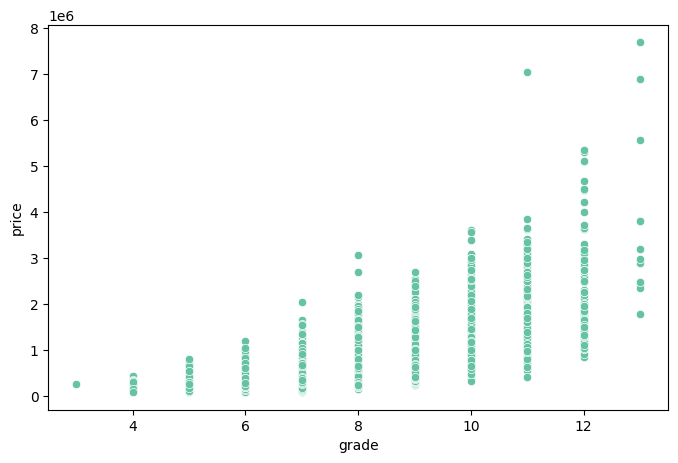

In [77]:
sns.scatterplot(data=combined_dropped, x="grade", y="price")


<Axes: xlabel='grade', ylabel='price'>

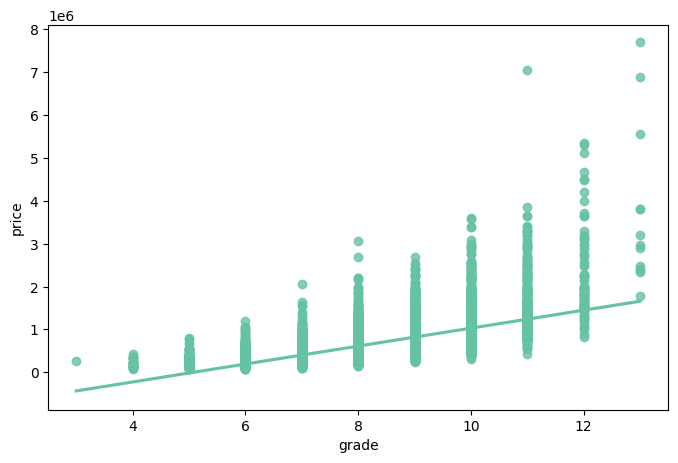

In [78]:

sns.set_palette("Set2")
sns.regplot(data=combined_dropped, x="grade", y="price")

<Axes: xlabel='grade', ylabel='price'>

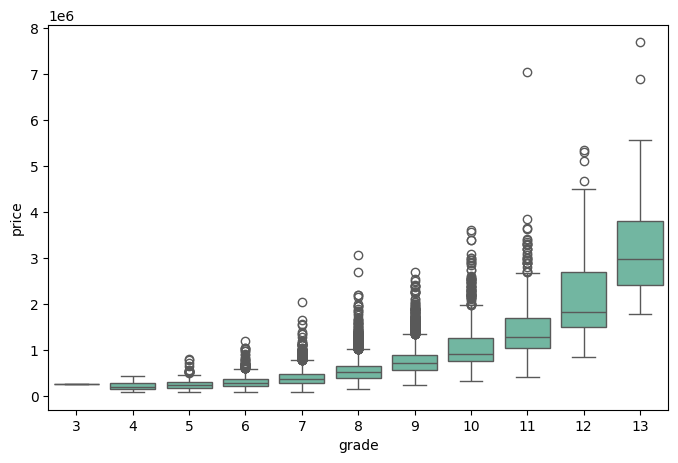

In [79]:
sns.set_palette("Set2")
sns.boxplot(data=combined_dropped, x="grade", y="price")


#### View X Price

In [80]:
combined_dropped["view_quality"].corr(combined_dropped["price"], method="pearson")

np.float64(0.3964131492622556)

<Axes: xlabel='view_quality', ylabel='price'>

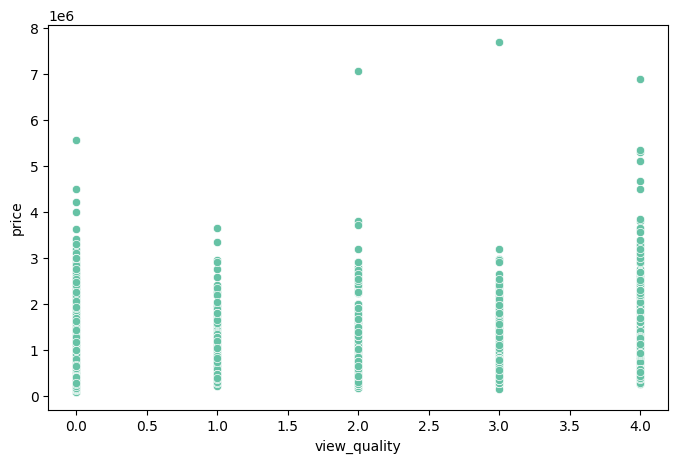

In [81]:
sns.set_palette("Set2")
sns.scatterplot(data=combined_dropped, x="view_quality", y="price")

<Axes: xlabel='view_quality', ylabel='price'>

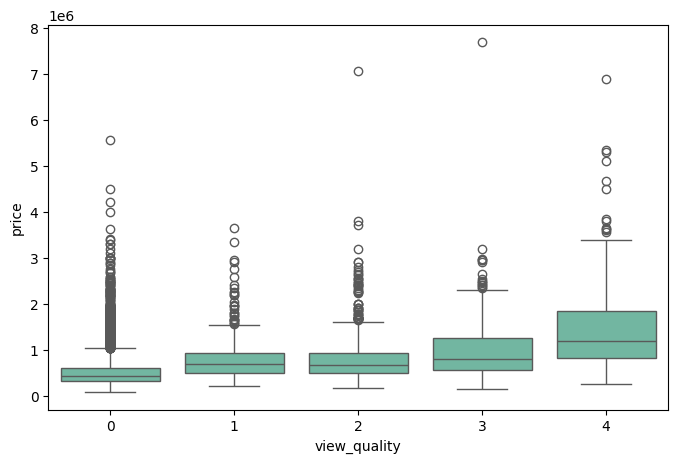

In [82]:
sns.set_palette("Set2")
sns.boxplot(data=combined_dropped, x="view_quality", y="price")

#### Condition X Price

In [94]:
combined_dropped["condition"].corr(combined_dropped["price"], method="pearson")

np.float64(0.03605637548609496)

<Axes: xlabel='condition', ylabel='price'>

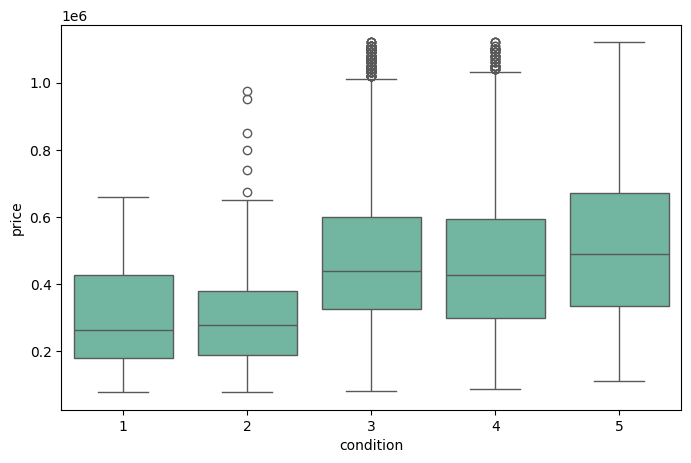

In [99]:
sns.set_palette("Set2")
sns.boxplot(data=combined_clean, x="condition", y="price")

#### Waterfront X Price

In [83]:
combined_dropped["sqft_lot"].corr(combined_dropped["waterfront"], method="pearson")

np.float64(0.02145877848684655)

<Axes: xlabel='waterfront', ylabel='price'>

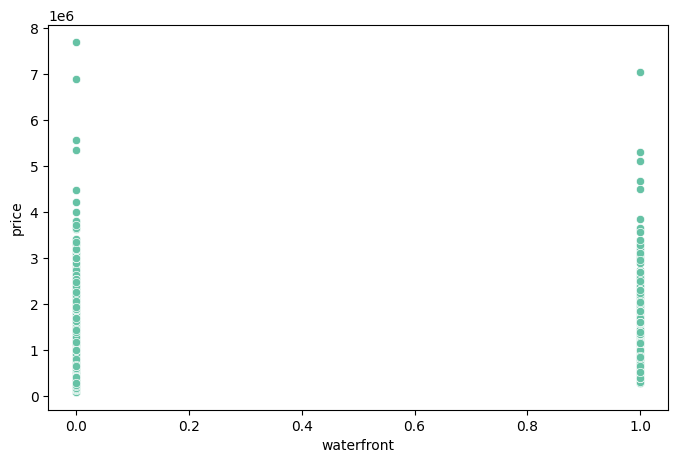

In [84]:
sns.set_palette("Set2")
sns.scatterplot(data=combined_dropped, x="waterfront", y="price")

<Axes: xlabel='waterfront', ylabel='price'>

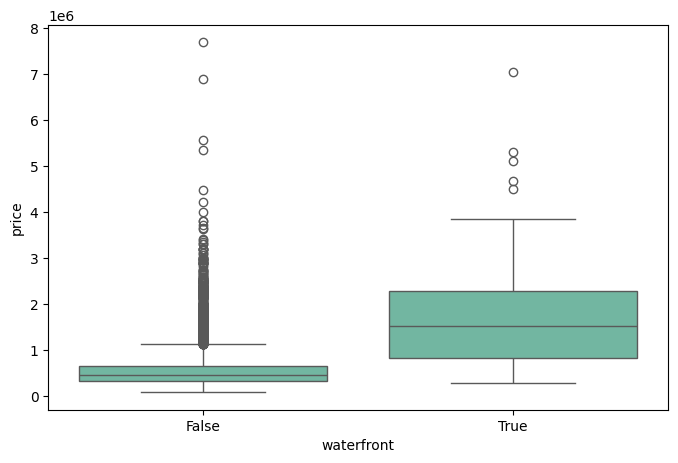

In [85]:
sns.set_palette("Set2")
sns.boxplot(data=combined_dropped, x="waterfront", y="price")

In [86]:
# Compare descriptive statistics for houses with waterfront and without waterfront
df_wf = combined_dropped[combined_dropped["waterfront"] == True]
df_wf.describe()

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,view_quality,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,146,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,...,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,2014-10-29 16:16:26.301369856,"1,717,214.73","4,454,968,693.05","10,216.97",3.35,2.28,"3,244.75","25,870.88",1.57,3.79,...,8.84,"2,508.76",735.99,"1,962.28","1,970.53","98,096.71",47.54,-122.28,"2,682.83","22,893.70"
min,2014-05-08 00:00:00,"285,000.00","121,029,034.00",50.00,1.00,0.00,440.00,"1,989.00",1.00,1.00,...,5.00,440.00,0.00,"1,905.00","1,905.00","98,004.00",47.33,-122.51,750.00,"3,230.00"
25%,2014-07-23 06:00:00,"827,500.00","2,016,368,797.00","4,235.75",3.00,1.25,"2,082.50","11,692.25",1.00,4.00,...,8.00,"1,565.00",0.00,"1,941.25","1,952.25","98,040.00",47.45,-122.38,"2,075.00","11,991.50"
50%,2014-10-25 00:00:00,"1,510,000.00","3,692,779,634.00","10,642.00",3.00,2.00,"2,900.00","17,730.50",2.00,4.00,...,9.00,"2,200.00",560.00,"1,959.50","1,977.00","98,075.00",47.55,-122.27,"2,695.00","16,260.50"
75%,2015-01-27 18:00:00,"2,282,500.00","7,390,450,150.00","15,778.75",4.00,3.00,"4,117.50","26,692.50",2.00,4.00,...,10.00,"3,220.00","1,265.00","1,984.75","1,991.00","98,155.00",47.61,-122.21,"3,140.00","24,537.50"
max,2015-05-11 00:00:00,"7,060,000.00","9,808,700,762.00","21,561.00",6.00,6.00,"10,040.00","505,166.00",3.00,4.00,...,12.00,"7,680.00","4,820.00","2,014.00","2,014.00","98,199.00",47.77,-122.06,"4,913.00","192,268.00"
std,NaN,"1,145,384.86","2,858,044,756.51","6,427.84",1.10,1.17,"1,652.13","44,629.08",0.57,0.55,...,1.78,"1,283.72",803.73,27.12,26.71,60.60,0.11,0.12,808.41,"23,264.09"


In [87]:
pd.set_option("display.float_format", "{:,.2f}".format)
combined_dropped.describe()

,date_sold,price,house_id,sale_id,no_bedrooms,no_bathrooms,sqft_living,sqft_lot,no_floors,view_quality,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00",...,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,2014-10-29 04:20:38.171968512,"540,296.57","4,580,474,287.77","10,799.00",3.37,1.75,"2,080.32","15,099.41",1.45,0.23,...,7.66,"1,788.60",291.73,"1,971.00","1,972.95","98,077.95",47.56,-122.21,"1,986.62","12,758.28"
min,2014-05-02 00:00:00,"78,000.00","1,000,102.00",1.00,1.00,0.00,370.00,520.00,1.00,0.00,...,3.00,370.00,0.00,"1,900.00","1,900.00","98,001.00",47.16,-122.52,399.00,651.00
25%,2014-07-22 00:00:00,"322,000.00","2,123,049,175.00","5,400.00",3.00,1.00,"1,430.00","5,040.00",1.00,0.00,...,7.00,"1,190.00",0.00,"1,951.00","1,954.00","98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,2014-10-16 00:00:00,"450,000.00","3,904,930,410.00","10,799.00",3.00,2.00,"1,910.00","7,618.00",1.00,0.00,...,7.00,"1,560.00",0.00,"1,975.00","1,977.00","98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,2015-02-17 00:00:00,"645,000.00","7,308,900,490.00","16,198.00",4.00,2.00,"2,550.00","10,685.00",2.00,0.00,...,8.00,"2,210.00",560.00,"1,997.00","1,999.00","98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,2015-05-27 00:00:00,"7,700,000.00","9,900,000,190.00","21,597.00",33.00,8.00,"13,540.00","1,651,359.00",3.00,4.00,...,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"
std,NaN,"367,368.14","2,876,735,715.75","6,234.66",0.93,0.73,918.11,"41,412.64",0.55,0.77,...,1.17,827.76,442.67,29.38,28.95,53.51,0.14,0.14,685.23,"27,274.44"


#### SQFT Lot X Price

In [88]:
combined_dropped["sqft_lot"].corr(combined_dropped["price"], method="pearson")

np.float64(0.0898762209908387)

In [89]:
# Getting rid of outliers for sqft_lot vs. price

Q1 = combined_dropped['sqft_lot'].quantile(0.25)
Q3 = combined_dropped['sqft_lot'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

combined_clean = combined_dropped[(combined_dropped['sqft_lot'] >= lower) & (combined_dropped['sqft_lot'] <= upper)]

<Axes: xlabel='sqft_lot', ylabel='price'>

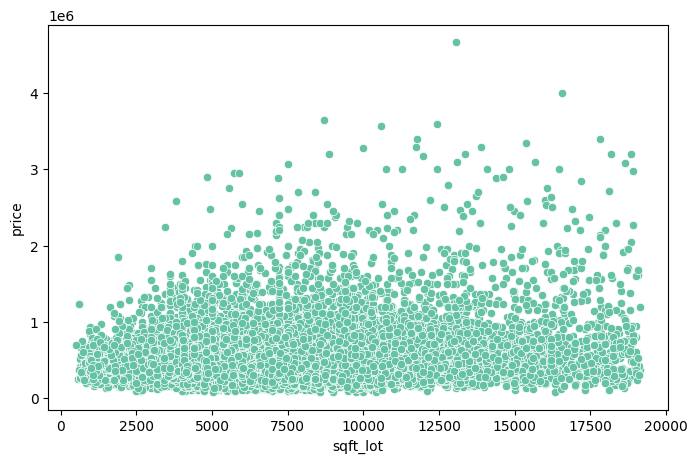

In [90]:
#sns.set_palette("Set2")
#sns.scatterplot(data=combined_dropped, x="sqft_lot", y="price")

sns.set_palette("Set2")
sns.scatterplot(data=combined_clean, x="sqft_lot", y="price")


#### Date Sold X Price

In [91]:
weekly_avg = combined_dropped.set_index("date_sold").resample("W")["price"].mean().reset_index()

weekly = (
    combined_dropped
    .set_index("date_sold")
    .resample("W")                           # weekly
    .agg({
        "price": "mean",
        "sale_id": "count"                   # or "house_id": "count"
    })
    .reset_index()
)

weekly.rename(columns={"sale_id": "sales_count"}, inplace=True)

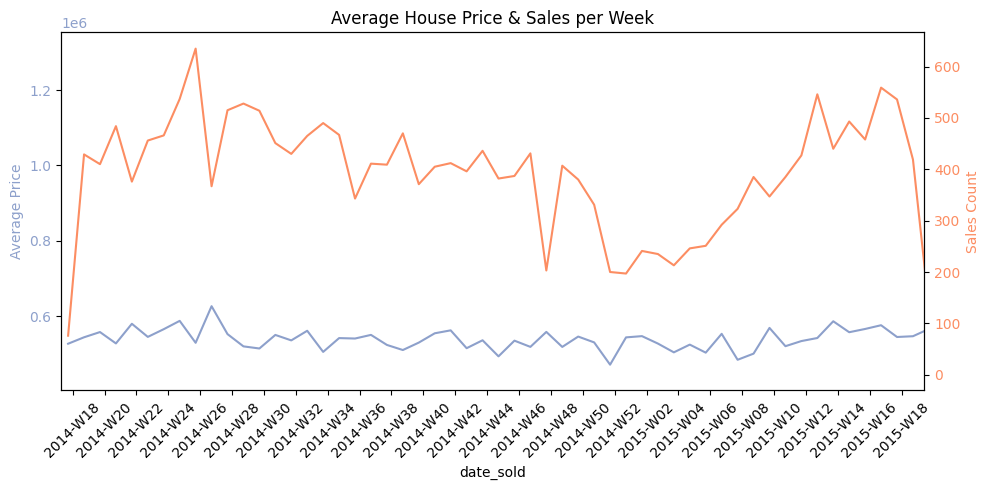

In [92]:

import matplotlib.dates as mdates
fig, ax1 = plt.subplots(figsize=(10, 5))
colors = ["#8DA0CB", "#FC8D62"]

# First line: average price
sns.lineplot(data=weekly_avg, x="date_sold", y="price", ax=ax1, color=colors[0])
ax1.set_ylabel("Average Price", color=colors[0])
ax1.tick_params(axis="y", labelcolor=colors[0])
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-W%U"))

# Second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=weekly, x="date_sold", y="sales_count", ax=ax2, color=colors[1])
ax2.set_ylabel("Sales Count", color=colors[1])
ax2.tick_params(axis="y", labelcolor=colors[1])

for label in ax1.get_xticklabels():
    label.set_rotation(45)

plt.xlim(pd.to_datetime("2014-05-01"), pd.to_datetime("2015-05-15"))
#plt.ylim(0, 750000)
plt.title("Average House Price & Sales per Week")
plt.xlabel("Week")
plt.tight_layout()
plt.show()

In [93]:
combined_dropped.columns

Index(['date_sold', 'price', 'house_id', 'sale_id', 'no_bedrooms',
       'no_bathrooms', 'sqft_living', 'sqft_lot', 'no_floors', 'waterfront',
       'view_quality', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

#### Zipcode x price

In [ ]:
# Average price per zipcode with number of sales   
avg_price_zip = combined_dropped.groupby("zipcode").agg(
    avg_price = ("price", "mean"),
    sales_count = ("sale_id", "count")
).reset_index()
avg_price_zip.sort_values(by="avg_price", ascending=False).head(70)



,zipcode,avg_price,sales_count
24,98039,"2,161,300.00",50
3,98004,"1,356,523.99",317
25,98040,"1,194,873.64",282
48,98112,"1,096,239.01",269
41,98102,"899,607.67",104
...,...,...,...
61,98148,"284,908.60",57
0,98001,"281,194.87",361
20,98032,"251,296.24",125
64,98168,"240,328.37",269


<Axes: xlabel='zipcode', ylabel='price'>

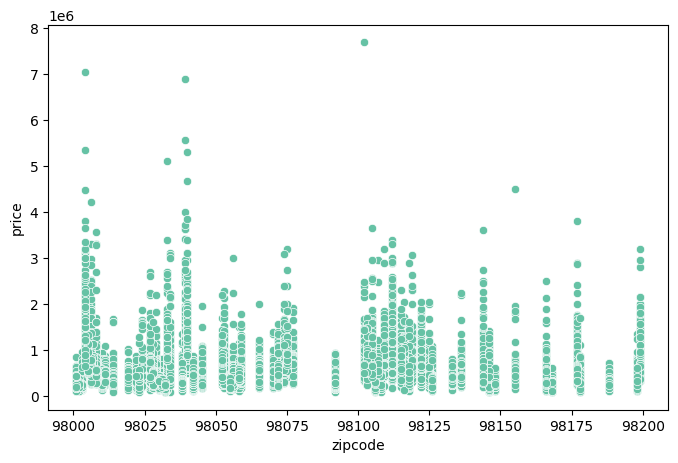

In [101]:
sns.set_palette("Set2")
sns.scatterplot(data=combined_dropped, x="zipcode", y="price")